<a href="https://colab.research.google.com/github/LeHoangHoa0941/CNN_AI_6_training_image/blob/main/Money_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.pooling import MaxPooling2D
from keras.backend import conv2d
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.layers.core.flatten import Flatten

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/Nhan_dien_tien/train'
test_path = '/content/drive/MyDrive/Nhan_dien_tien/test'

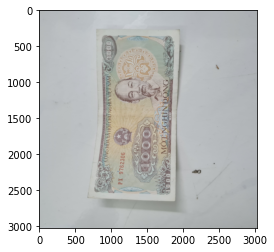

In [ ]:
img = load_img('/content/drive/MyDrive/Nhan_dien_tien/train/1k/1k (14).jpg')
rotated_image = img.rotate(0)
plt.imshow(rotated_image)

In [ ]:
X_train = ImageDataGenerator(rescale=1/255)
X_test = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = X_train.flow_from_directory(
    directory=r"/content/drive/MyDrive/Nhan_dien_tien/train",
    target_size=(150, 150),
    batch_size=3,
    class_mode="categorical",
    )
test_dataset = X_test.flow_from_directory(
    directory=r"/content/drive/MyDrive/Nhan_dien_tien/test",
    target_size=(150, 150),
    batch_size=3,
    class_mode= "categorical",
    )

Found 452 images belonging to 9 classes.
Found 238 images belonging to 9 classes.


In [ ]:
train_dataset.class_indices

{'100k': 0,
 '10k': 1,
 '1k': 2,
 '200k': 3,
 '20k': 4,
 '2k': 5,
 '500k': 6,
 '50k': 7,
 '5k': 8}

In [ ]:
from keras.layers.core.flatten import Flatten
model = Sequential([
    Conv2D(16,(3,3), padding='same', activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32,(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64,(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128,(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128,(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(9, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        1

In [ ]:
model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics =['accuracy'])
history=model.fit(train_dataset,epochs=30,batch_size=64,verbose=1,validation_data= test_dataset)

Epoch 1/30
151/151 [==============================] - 354s 2s/step - loss: 2.1979 - accuracy: 0.1637 - val_loss: 2.1825 - val_accuracy: 0.1513
Epoch 2/30
151/151 [==============================] - 85s 563ms/step - loss: 2.1621 - accuracy: 0.1858 - val_loss: 2.1740 - val_accuracy: 0.1513
Epoch 3/30
151/151 [==============================] - 85s 562ms/step - loss: 2.1679 - accuracy: 0.1858 - val_loss: 2.1635 - val_accuracy: 0.1513
Epoch 4/30
151/151 [==============================] - 85s 562ms/step - loss: 2.1643 - accuracy: 0.1792 - val_loss: 2.1672 - val_accuracy: 0.1513
Epoch 5/30
151/151 [==============================] - 85s 562ms/step - loss: 2.1633 - accuracy: 0.1881 - val_loss: 2.1641 - val_accuracy: 0.1513
Epoch 6/30
151/151 [==============================] - 85s 564ms/step - loss: 2.1100 - accuracy: 0.1770 - val_loss: 1.8310 - val_accuracy: 0.2521
Epoch 7/30
151/151 [==============================] - 84s 559ms/step - loss: 1.7417 - accuracy: 0.3274 - val_loss: 1.4763 - val_accu

In [ ]:
model.save('money_training.h5')

In [ ]:
from keras.models import load_model
model5 = load_model('money_training.h5')

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['accuracy'],
                         mode='lines+markers',
                         name='Training accuracy'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_accuracy'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig.update_layout(title='Accuracy',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))
fig.show()

In [ ]:
labels = {0: '100k',
          1: '10k',
          2: '1k',
          3: '200k',
          4: '20k',
          5: '2k',
          6: '500k',
          7: '50k',
          8: '5k'}

Day la to tien:  500k


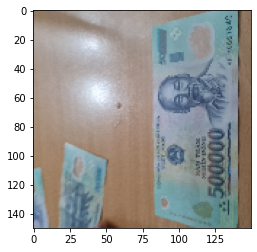

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Nhan_dien_tien/test/500k/500k (119).jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Day la to tien: ', labels[np.argmax(val)])

Day la to tien:  50k


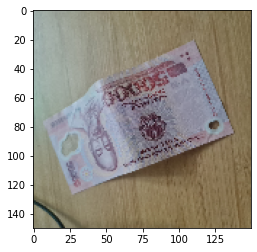

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Nhan_dien_tien/test/50k/50k (43).jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Day la to tien: ', labels[np.argmax(val)])

Day la to tien:  1k


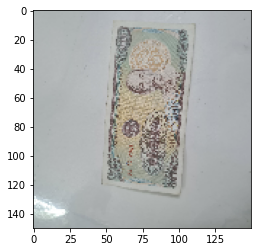

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Nhan_dien_tien/test/1k/1k (8).jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Day la to tien: ', labels[np.argmax(val)])

Day la to tien:  20k


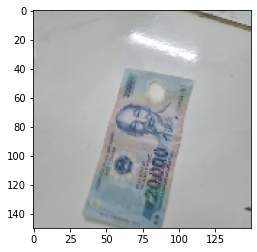

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Nhan_dien_tien/test/20k/20k (62).jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Day la to tien: ', labels[np.argmax(val)])

Day la to tien:  2k


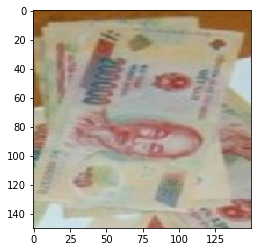

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Nhan_dien_tien/test/200k/200k (24).jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Day la to tien: ', labels[np.argmax(val)])